<a href="https://colab.research.google.com/github/Jaser2005/OIBSIP/blob/master/Emial_Spam_Detection_With_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Hello Everyone! This is MOHAMMED JASER JALAL
Intern at OASIS INFOBYTE, India.

I'm very thrilled to share my First Task in Oasis Infobyte Intership November 2025 viz. Email Spam Detection With Machine Learning.
'''
# AUTHOR: MOHAMMED JASER JALAL
# TASK NAME: Email Spam Detection With Machine Learning
# 4th Task in the list of Tasks
# TASK CATEGORY: Data Science
# DATE OF SUBMISSION: 15 December 2025
# LinkedIn Profile: https://www.linkedin.com/in/jaser-jalal-a56b43256
# GitHub Profile: https://github.com/Jaser2005/OIBSIP


In [91]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import joblib

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
# Step 2: Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df =df[['label', 'message']] #keep only neede columns
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [94]:
# Step 3: Encode labels (ham = 0, spam =1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [95]:
# Step 4: Check for missing values
print(df.isnull().sum())

label        0
message      0
label_num    0
dtype: int64


In [96]:
# Step 5: Basic EDA
print("Number of Spam messages:", df[df['label_num']==1].shape[0])
print("Number of Ham messages:", df[df['label_num']==0].shape[0])

Number of Spam messages: 747
Number of Ham messages: 4825


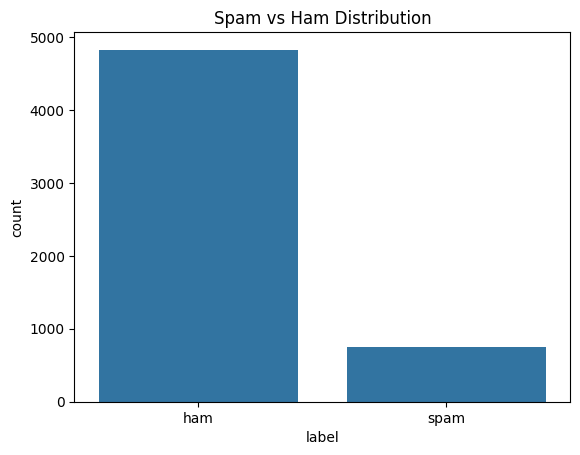

In [97]:
# Visualize sns distribution
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

In [98]:
# Step 6: Text Cleaning Function
import nltk
from nltk.corpus import stopwords
import re
import string
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  #lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  #remove links
    text = re.sub(r'\W', ' ', text)  #remove special chars
    text = re.sub(r'\s+', ' ', text) #remove extra spaces
    text = ''.join([char for char in text if char not in string.punctuation])
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)
df['clean_message'] = df['message'].apply(clean_text)

print("Sample cleaned text:")
print(df[['message', 'clean_message']].head())

Sample cleaned text:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# Step 7: Split dataset
X = df['clean_message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
# Step 8: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF vectorization complete!")

TF-IDF vectorization complete!


In [101]:
# Step 9: Train models ~ 3 models...

# --- Model 1: Multinomial Naive Bayes ---
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("\n Multinomial Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



 Multinomial Naive Bayes Results:
Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [102]:
# --- Model 2: Logistic Regresion ---
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("\n Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


 Logistic Regression Results:
Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.98      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [103]:
# --- Model 3: Support Vector Machine ---
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("\n Linear SVC Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_svm))





 Linear SVC Results:
Accuracy: 0.9721973094170404
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



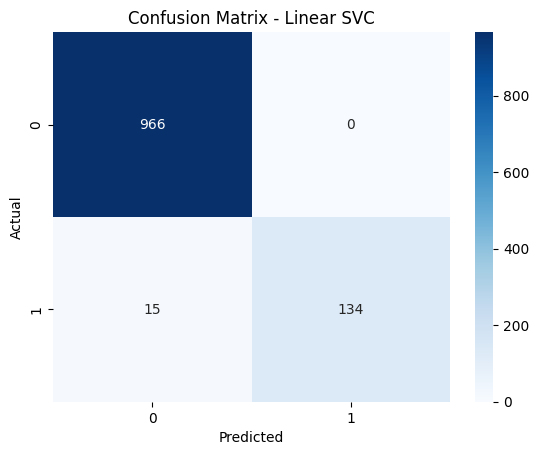

In [104]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Linear SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [107]:
# Step 11: Save the best model & vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
joblib.dump(svm, "spam_detector_model.joblib")

print("\n Model and Vectorizer saved successfully!")


 Model and Vectorizer saved successfully!
